In [3]:
# Load all the tools
import numpy as np
# from wisdem.aeroelasticse.CaseLibrary import ROSCO_Test
import os

from weis.aeroelasticse.FAST_reader import InputReader_Common, InputReader_OpenFAST, InputReader_FAST7
from weis.aeroelasticse.FAST_writer import InputWriter_Common, InputWriter_OpenFAST, InputWriter_FAST7
from weis.aeroelasticse.runFAST_pywrapper import runFAST_pywrapper_batch
from weis.aeroelasticse.CaseGen_General import CaseGen_General
from weis.aeroelasticse.CaseGen_IEC import CaseGen_IEC
from pCrunch import pdTools
from pCrunch import Processing, Analysis
from weis.aeroelasticse.Util import FileTools
# Instantiate fast_IO
from ROSCO_toolbox import utilities as ROSCO_utilities
fast_io = ROSCO_utilities.FAST_IO()
fast_pl = ROSCO_utilities.FAST_Plots()
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


# Test Results Directory

In [180]:
sim_case = 'simp+fl_phase'


# Pitch Control Sweep
test_dir = ['/Users/dzalkind/Tools/WEIS-3/outputs/iea15mw/PC_sweep_play']

# Floating Feedback Sweep
test_dir = ['/Users/dzalkind/Tools/WEIS-3/results/CT-spar/DISCON_fixed_ps100_const_pwr/simp_fl']

# Phase Sweep


if sim_case == 'ntm+pc_mode':
    test_dir = [
               '/Users/dzalkind/Tools/WEIS-3/results/CT-spar/DISCON_CT-spar_ps100/ntm+pc_mode',
               ]
elif sim_case == 'simp+pc_mode':
    test_dir = [
               '/Users/dzalkind/Tools/WEIS-3/results/CT-spar/DISCON_CT-spar_ps100/simp+pc_mode',
               ]
    
elif sim_case == 'simp+fl_phase':
    test_dir = [
#                '/Users/dzalkind/Tools/WEIS-3/results/CT-spar/DISCON_CT-spar_ps100/simp+fl_phase',
        '/Users/dzalkind/Tools/WEIS-3/results/CT-spar/DISCON_CT-spar_lowBW/fl_phase'
               ]

# name_base  = 'dataset1'

In [181]:
# Load case matrix into dataframe
case_matrix = [None] * len(test_dir)
cm   = [None] * len(test_dir)
fastFile  = [None] * len(test_dir)
fastRead  = [None] * len(test_dir)

for i, dir in enumerate(test_dir):
    case_matrix[i] = FileTools.load_yaml(os.path.join(test_dir[i],'case_matrix.yaml'), package=1)
    cm[i] = pd.DataFrame(case_matrix[i])

    # Get ALL FAST info
    fastRead[i] = InputReader_OpenFAST(FAST_ver='OpenFAST', dev_branch=True)
    fastFile[i] = os.path.join(test_dir[i],cm[i]['Case_Name'][0] + '.fst')
    fastRead[i].FAST_InputFile = os.path.basename(fastFile[i])   # FAST input file (ext=.fst)
    fastRead[i].FAST_directory = os.path.dirname(fastFile[i])   # Path to fst directory files
    fastRead[i].execute()


Loading rotor performace data from text file: /Users/dzalkind/Tools/WEIS-3/results/CT-spar/DISCON_CT-spar_lowBW/fl_phase/step_000_Cp_Ct_Cq.txt


$x^2$

In [182]:
# inds = [
#         ('meta','Fl_Phase'),
#     ('DISCON_in', 'F_FlCornerFreq'),
#     ('DISCON_in', 'F_FlHighPassFreq'),
#     ('DISCON_in', 'Fl_Kp'),
    
# ]


if 'pc_mode' in sim_case:
    inds = [
            ('meta','omega'),
            ('meta','zeta'),
        ('InflowWind','Filename')

    ]
elif 'fl_phase' in sim_case:
    inds = [
        ('meta', 'phase_30'),
        ('DISCON_in', 'F_FlCornerFreq'),
        ('DISCON_in', 'F_FlHighPassFreq'),
        ('DISCON_in', 'Fl_Kp'),
    ]
else:
    print('WARNING: your sim_case is messed up')

cm[0][inds].head(30)



,"(meta, phase_30)","(DISCON_in, F_FlCornerFreq)","(DISCON_in, F_FlHighPassFreq)","(DISCON_in, Fl_Kp)"
0,-76.357,0.02,0.01,-250.035
1,-70.963,0.03,0.01,-114.558
2,-65.641,0.04,0.01,-67.141
3,-60.412,0.05,0.01,-45.194
4,-55.295,0.06,0.01,-33.272
5,-50.305,0.07,0.01,-26.084
6,-45.456,0.08,0.01,-21.418
7,-40.758,0.09,0.01,-18.219
8,-36.221,0.10,0.01,-15.931
9,-31.848,0.11,0.01,-14.238


In [183]:
# Set up pCrunch, run if not already
reCrunch = False

name_base = 'dataset1'
# Do stats yaml exist?
stat_yaml_there = [os.path.exists(os.path.join(test,'stats',name_base + '_stats.yaml')) for test in test_dir]

outfiles = [[os.path.join(test, cn + '.outb') for cn in cm[0].Case_Name] for test in test_dir]



fp = [None]*len(test_dir)
st = [None]*len(test_dir)
lr = [None]*len(test_dir)
stats = [None]*len(test_dir)
load_rankings = [None]*len(test_dir)
# Load and save statistics and load rankings
for i_test, test in enumerate(test_dir):
    if not stat_yaml_there[i_test] or reCrunch:

        # Set some processing parameters
        fp[i_test] = Processing.FAST_Processing()
        fp[i_test].results_dir              = os.path.join(test, 'stats')
        fp[i_test].OpenFAST_outfile_list    = outfiles[i_test]
        fp[i_test].t0                       = 200         
        fp[i_test].parallel_analysis        = True
        fp[i_test].parallel_cores           = 8
#         fp[i_test].DEL_info = [('TwrBsMyt', 4)]#, ('RootMyb2', 10), ('RootMyb3', 10)]


        fp[i_test].verbose                  = True
        fp[i_test].save_LoadRanking         = True
        fp[i_test].save_SummaryStats        = True
        
        fp[i_test].ranking_vars.append(['GenPwr']), fp[i_test].ranking_stats.append('max')
        fp[i_test].ranking_vars.append(['GenSpeed']), fp[i_test].ranking_stats.append('std')
        fp[i_test].ranking_vars.append(['TwrBsMyt']), fp[i_test].ranking_stats.append('max')
        fp[i_test].ranking_vars.append(['TwrBsMyt']), fp[i_test].ranking_stats.append('std')
        fp[i_test].ranking_vars.append(['TwrBsMxt']), fp[i_test].ranking_stats.append('max')
        fp[i_test].ranking_vars.append(['NcIMUTAxs']), fp[i_test].ranking_stats.append('std')
        fp[i_test].ranking_vars.append(['NcIMUTAys']), fp[i_test].ranking_stats.append('std')

        stats[i_test], load_rankings[i_test] = fp[i_test].batch_processing()
        
    # re-load to get rid of dataset
    stats[i_test] = FileTools.load_yaml(os.path.join(os.path.join(test, 'stats'),name_base+'_stats.yaml'), package=1)
    load_rankings[i_test] = FileTools.load_yaml(os.path.join(os.path.join(test, 'stats'),name_base+'_LoadRanking.yaml'), package=1)

    # Turn into dataframe
    st[i_test] = pdTools.dict2df(stats[i_test])
    lr[i_test] = pdTools.dict2df(load_rankings[i_test])
    


Look at raw data here

In [184]:
# Load Ranking

st[0]['TwrBsMyt','std']

# cm[0]['meta','phase_50']

0      85195.400625
1      35548.929308
2      16968.640547
3      10941.601213
4       9200.510414
           ...     
151    10071.760462
152    10104.177706
153    10136.864115
154    10170.231543
155    10204.519202
Name: (TwrBsMyt, std), Length: 156, dtype: float64

# Parameter-Based Scatter Plots

In [189]:
# Add parameter to stat df

windspeeds = [st_i['Wind1VelX']['mean'].to_numpy() for st_i in st]

parameters = []
if True:
    for c, ws in zip(cm,windspeeds):
        c[('meta','MeanWS')] = ws.astype(int)

if 'pc_mode' in sim_case:
    parameters = [
        ('meta','omega'),
        ('meta','zeta'),
        ('meta','MeanWS')
    ]
elif 'fl_phase' in sim_case:
    parameters = [
        ('meta','phase_30'),
        ('meta','phase_50'),
        ('meta','MeanWS'),
        'Case_ID',
#         ('TwrBsMyt','std'),
        ('DISCON_in', 'F_FlCornerFreq'),
        ('DISCON_in', 'Fl_Kp')
        
    ]

# parameters
# parameter = ('DISCON_in','Fl_Kp')

# Add cm fields to st
p2 = [None] * len(parameters)
for i_dir in range(0,len(st)):
    for i_param, param in enumerate(parameters):
        if isinstance(param,tuple):
            st[i_dir][param[0],param[1]] = cm[i_dir][param]
            p2[i_param] = param
        else:
            st[i_dir]['meta',param] = cm[i_dir][param]
            p2[i_param] = ('meta',param)
parameters = p2


# Add st fields to parameters
st_parameters = [
    ('TwrBsMyt','std'),
    ('PtfmPitch','std'),
    ('PtfmYaw','std')
    
]

for st_p in st_parameters:
    parameters.append(st_p)

parameters

[('meta', 'phase_30'),
 ('meta', 'phase_50'),
 ('meta', 'MeanWS'),
 ('meta', 'Case_ID'),
 ('DISCON_in', 'F_FlCornerFreq'),
 ('DISCON_in', 'Fl_Kp'),
 ('TwrBsMyt', 'std'),
 ('PtfmPitch', 'std'),
 ('PtfmYaw', 'std')]

Select Cases

In [190]:
indSel  = [True] * len(st[0])

if 'pc_mode' in sim_case:
    indZeta = st[0]['meta','zeta'] == 1.5
    indWind = st[0]['meta','MeanWS'] == 11
    indSel  = indZeta & indWind

    
elif 'fl_phase' in sim_case:
    # indOmega1 = st[0]['meta','omega'] > 0.07
    # indPhase = st[0]['meta','phase_30'] > -9000
    indWind = st[0]['meta','MeanWS'] == 12
    indSel = indWind


parameters.append(('TwrBsMyt','std'))

st[0]['TwrBsMyt','std'].loc[indSel]
st[0][parameters].loc[indSel]
# parameters


# st[0][parameters].loc[indSel]
# parameters
# st[0]['InflowWind','Filename'][150]
# cm[0][('InflowWind','Filename')][150]
# i_dir
# cm[i_dir][param][150]
# st[i_dir][param[0],param[1]]

# ws.astype(int)

# st[0]['meta','MeanWS']

meta                              DISCON_in               TwrBsMyt  \
    phase_30 phase_50 MeanWS Case_ID F_FlCornerFreq    Fl_Kp           std   
78   -76.357  -67.364     12      78           0.02 -250.035  82924.228224   
79   -70.963  -58.596     12      79           0.03 -114.558  71925.396169   
80   -65.641  -50.137     12      80           0.04  -67.141  37628.605738   
81   -60.412  -42.056     12      81           0.05  -45.194  20991.326583   
82   -55.295  -34.404     12      82           0.06  -33.272  24654.066599   
83   -50.305  -27.211     12      83           0.07  -26.084  24876.585977   
84   -45.456  -20.487     12      84           0.08  -21.418  24149.090494   
85   -40.758  -14.230     12      85           0.09  -18.219  24550.873829   
86   -36.221   -8.426     12      86           0.10  -15.931  24629.930430   
87   -31.848   -3.055     12      87           0.11  -14.238  24661.877602   
88   -27.645    1.908     12      88           0.12  -12.951  24704.244792   
89   -23.610    6.493     12      89           0.13  -11.949  24785.126933   
90   -19.745   10.728     12      90           0.14  -11.154  25073.279450   
91   -16.046   14.640     12      91           0.15  -10.512  23281.108918   
92   -12.511   18.258     12      92           0.16   -9.987  23401.643382   
93    -9.135   21.606     12      93           0.17   -9.552  23575.824775   
94    -5.912   24.710     12      94           0.18   -9.188  24063.740474   
95    -2.839   27.590     12      95           0.19   -8.879  24602.153864   
96     0.092   30.266     12      96           0.20   -8.616  24982.148266   
97     2.887   32.757     12      97           0.21   -8.389  25296.585110   
98     5.551   35.080     12      98           0.22   -8.192  25580.322166   
99     8.091   37.249     12      99           0.23   -8.021  25838.967698   
100   10.513   39.277     12     100           0.24   -7.870  26087.115781   
101   12.824   41.177     12     101           0.25   -7.738  26337.771654   
102   15.028   42.959     12     102           0.26   -7.620  26632.901544   
103   17.132   44.633     12     103           0.27   -7.515  27089.470390   
104   19.141   46.209     12     104           0.28   -7.421  28061.862215   
105   21.060   47.693     12     105           0.29   -7.337  27369.446937   
106   22.893   49.094     12     106           0.30   -7.261  25612.216560   
107   24.647   50.418     12     107           0.31   -7.192  26631.620095   
108   26.324   51.670     12     108           0.32   -7.130  27001.429877   
109   27.930   52.856     12     109           0.33   -7.073  26860.050037   
110   29.468   53.981     12     110           0.34   -7.021  27646.867397   
111   30.941   55.050     12     111           0.35   -6.973  29455.726340   
112   32.354   56.065     12     112           0.36   -6.930  31216.354061   
113   33.709   57.032     12     113           0.37   -6.890  33616.968768   
114   35.010   57.952     12     114           0.38   -6.852  35625.440618   
115   36.260   58.830     12     115           0.39   -6.818  37005.750616   
116   37.461   59.669     12     116           0.40   -6.787  37960.042137   

    PtfmPitch   PtfmYaw      TwrBsMyt  
          std       std           std  
78   1.054844  0.186039  82924.228224  
79   1.102816  0.224564  71925.396169  
80   0.583855  0.205851  37628.605738  
81   0.304443  0.182138  20991.326583  
82   0.357383  0.164503  24654.066599  
83   0.353026  0.133390  24876.585977  
84   0.338328  0.126427  24149.090494  
85   0.346137  0.112459  24550.873829  
86   0.347931  0.104554  24629.930430  
87   0.349033  0.099529  24661.877602  
88   0.350324  0.096131  24704.244792  
89   0.352377  0.094007  24785.126933  
90   0.371703  0.084993  25073.279450  
91   0.357042  0.079581  23281.108918  
92   0.354497  0.078683  23401.643382  
93   0.358268  0.080290  23575.824775  
94   0.367705  0.081089  24063.740474  
95   0.377041  0.080756  24602.153864  
96   0.38

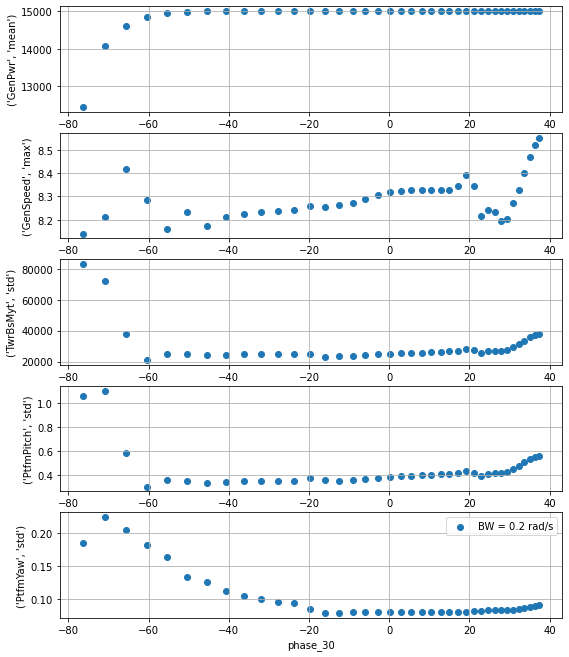

In [191]:
# Do plotting over these channels

ss_channels = [
               ('GenPwr','mean'),
#                ('GenPwr','max'),
               ('GenSpeed','max'),
#                ('RotThrust','max'),
               ('TwrBsMyt','std'),
               ('PtfmPitch','std'),
               ('PtfmYaw','std'),
#                ('NcIMUTAxs','std') 
              ]

# lin_del = FileTools.load_yaml('/Users/dzalkind/Tools/WEIS-3/outputs/iea15mw/PC_sweep_play/LinResults.yaml')

param_ind = 0


plt.rcParams["figure.figsize"] = [9,2.25 * len(ss_channels)]
# plt.rc('font', size=14)          # controls default text sizes

fig, ax = plt.subplots(len(ss_channels),1)

for st_i in st:
    for ichan, chan in enumerate(ss_channels):
        ax[ichan].scatter(st_i['meta',parameters[param_ind][1]].loc[indSel],st_i[chan[0],chan[1]].loc[indSel])
        ax[ichan].set_xlabel(parameters[param_ind][1])
        ax[ichan].set_ylabel(chan)
        ax[ichan].grid(True)

#     legs = tuple([os.path.basename(test) for test in test_dir])
    
# fig.canvas.toolbar_visible = True
# fig.canvas.header_visible = False
# fig.canvas.resizable = True

plt.legend(('BW = 0.2 rad/s','BW = 0.1 rad/s'))

# Review Load Ranking

In [96]:
lr[0]['TwrBsMyt']

,max,max_case_idx,std,std_case_idx
0,511954.497085,158,205449.357440,158
1,502504.337562,116,205259.512770,159
2,500825.801601,112,193219.822333,117
3,500132.482093,159,192750.383309,118
4,496376.972551,119,191522.082616,113
...,...,...,...,...
155,156300.206743,132,9029.383255,132
156,156190.616293,133,9027.376420,133
157,155750.073206,134,9025.264139,124
158,155488.844299,142,8961.205126,128


 # Plot Selected Cases

Fl_Pitcom is not available as an output channel.
FA_AccR is not available as an output channel.
SS_dOmF is not available as an output channel.
Fl_Pitcom is not available as an output channel.
FA_AccR is not available as an output channel.
SS_dOmF is not available as an output channel.


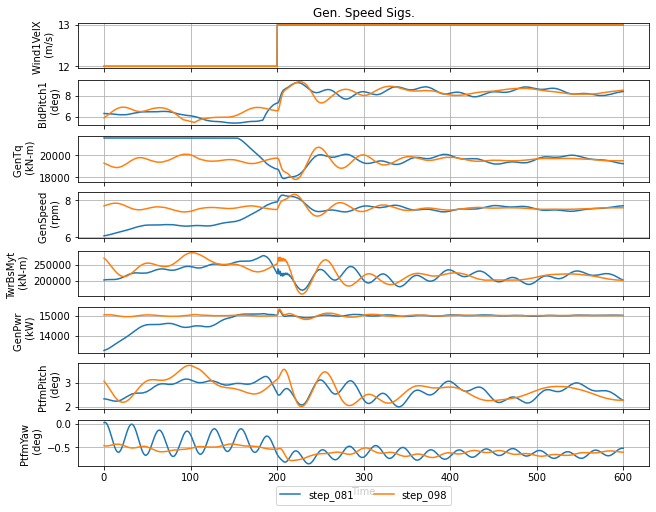

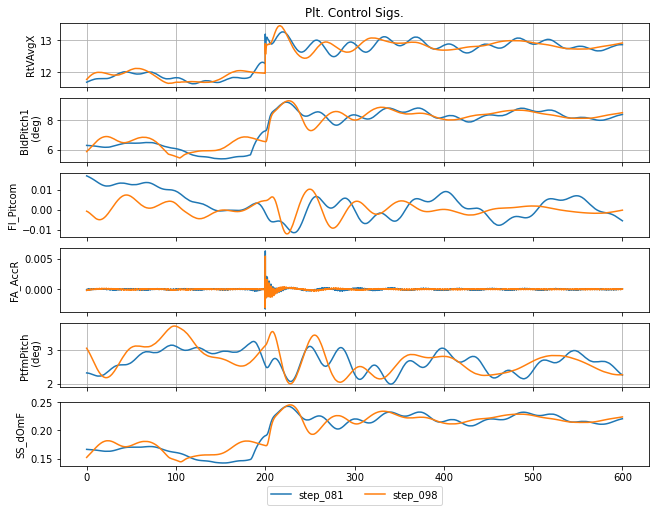

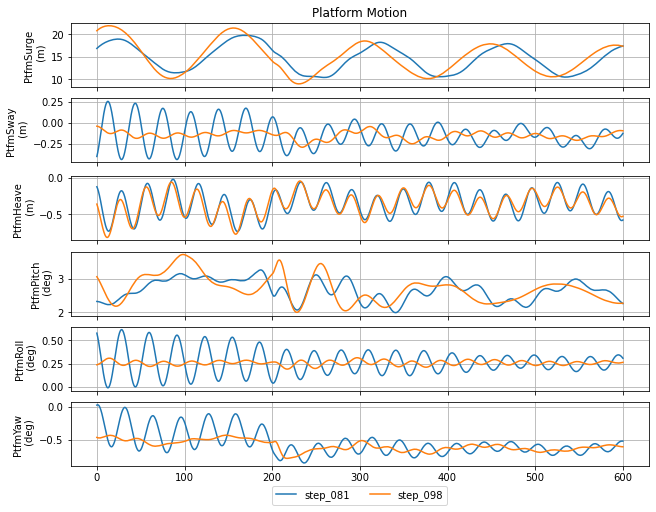

In [193]:
# Select Case I.D.s
case_ids = [81,98]


output_ext = '.out'
plt.rcParams["figure.figsize"] = [9,7]

#  Define Plot cases 
cases = {}
cases['Gen. Speed Sigs.'] = ['Wind1VelX', 'BldPitch1', 'GenTq', 'GenSpeed','TwrBsMyt','GenPwr','PtfmPitch','PtfmYaw']
cases['Plt. Control Sigs.'] = ['RtVAvgxh', 'BldPitch1', 'Fl_Pitcom', 'FA_AccR','PtfmPitch','SS_dOmF']
cases['Platform Motion'] = ['PtfmSurge', 'PtfmSway', 'PtfmHeave', 'PtfmPitch','PtfmRoll','PtfmYaw']


case_outs = [outs[case_id] for outs in outfiles for case_id in case_ids]

# Rosco outfiles
r_outfiles = [[os.path.join(test, cn + '.RO.dbg') for cn in cm[0].Case_Name] for test in test_dir]
r_case_outs = [r_outs[case_id] for r_outs in r_outfiles for case_id in case_ids]

# for i_case, case in enumerate(case_ids):
fast_out = fast_io.load_fast_out(case_outs, tmin=200)
rosco_out = fast_io.load_fast_out(r_case_outs, tmin=200)
    
# Combine outputs
comb_out = [None] * len(fast_out)
for i, (r_out, f_out) in enumerate(zip(rosco_out,fast_out)):
    r_out.update(f_out)
    comb_out[i] = r_out

# Plot
fig, ax = fast_pl.plot_fast_out(cases, comb_out, showplot=False)

# hard code axes labels because 
ax[1][0].set_ylabel('RtVAvgX')
ax[1][2].set_ylabel('Fl_Pitcom')
ax[1][3].set_ylabel('FA_AccR')
ax[1][5].set_ylabel('SS_dOmF')  


# legs = tuple([os.path.basename(test) for test in test_dir])
# plt.legend(legs, loc='upper center', bbox_to_anchor=(
#                     0.5, 0.0), borderaxespad=2, ncol=2)

ax[0][7].set_xlabel('Time')
# l1 = fig[0].legend(('BW = 0.1 rad/s','BW = 0.2 rad/s'))

plt.show()



In [38]:
# cont_out = '/Users/dzalkind/Tools/WEIS-3/results/CT-spar/DISCON_fixed_ps100_const_pwr/simp/step_0'


outfiles
case_outs
# # c
# # rosco_out = fast_io.load_fast_out(cont_out[i_case], tmin=200)
# # case_outs

# rosco_out = fast_io.load_fast_out(r_case_outs[i_case], tmin=200)
# # case_outs
# # fastout[0]

# # test_dir
# # comb_out = [comb_out.append(r_out.update(f_out)) for (r_out, f_out) in zip(rosco_out,fast_out)]

# # zip(rosco_out,fast_out)

# comb_out = [None] * len(test_dir)
# for i, (r_out, f_out) in enumerate(zip(rosco_out,fast_out)):
#     r_out.update(f_out)
#     comb_out[i] = r_out
    
    
    
# for i_case, case in enumerate(case_ids):
fast_out = fast_io.load_fast_out(case_outs, tmin=200)
rosco_out = fast_io.load_fast_out(r_case_outs, tmin=200)
    


In [39]:
# Combine outputs
comb_out = [None] * len(fast_out)
for i, (r_out, f_out) in enumerate(zip(rosco_out,fast_out)):
    r_out.update(f_out)
    comb_out[i] = r_out

comb_out

[{'Time': array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 5.9998e+02, 5.9999e+02,
         6.0000e+02]),
  'FA_AccF': array([1.136e-05, 1.134e-05, 1.132e-05, ..., 2.112e-06, 1.371e-06,
         6.292e-07]),
  'FA_AccR': array([ 4.204e-05,  3.824e-05,  3.607e-05, ..., -3.368e-04, -3.371e-04,
         -3.333e-04]),
  'RotSpeed': array([6.353, 6.353, 6.353, ..., 6.869, 6.869, 6.868]),
  'RotSpeedF': array([0.6649, 0.6649, 0.6649, ..., 0.729 , 0.7289, 0.7288]),
  'GenSpeed': array([6.353, 6.353, 6.353, ..., 6.869, 6.869, 6.868]),
  'GenSpeedF': array([0.6649, 0.6649, 0.6649, ..., 0.729 , 0.7289, 0.7288]),
  'FA_Acc': array([-0.005625, -0.005682, -0.005675, ..., -0.09746 , -0.09746 ,
         -0.09748 ]),
  'Fl_Pitcom': array([-0.0003333, -0.0003311, -0.0003288, ...,  0.0401   ,  0.0401   ,
          0.0401   ]),
  'PC_MinPit': array([0.    , 0.    , 0.    , ..., 0.1098, 0.1098, 0.1098]),
  'SS_dOmF': array([-0.0002463, -0.0002463, -0.0002463, ...,  0.2234   ,  0.2235   ,
          0.2235  

0